# Regression Model for Insurance Pricing

Objective: "This project aims to leverage machine learning to estimate insurance charges based on demographic and health-related attributes."

Dataset Information: "insurance.csv"

The analysis will evaluate model performance both with the presence of outliers and after addressing them.

### 1. Import important librairies

In [1]:
#for arrays
import numpy as np

#for reading .csv file
import pandas as pd

#for making plots
import matplotlib.pyplot as plt
import seaborn as sns

#for creating a neural network
import tensorflow as tf

#scaling, normalizing, splitting data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### 2. Reading "insurance.csv"

In [5]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Dataset Description
- **Features:**
  - Age
  - BMI (Body Mass Index)
  - Number of children
  - Smoking status
  - Region
- **Target Variable:** Insurance charges

### 3. Visualize the data

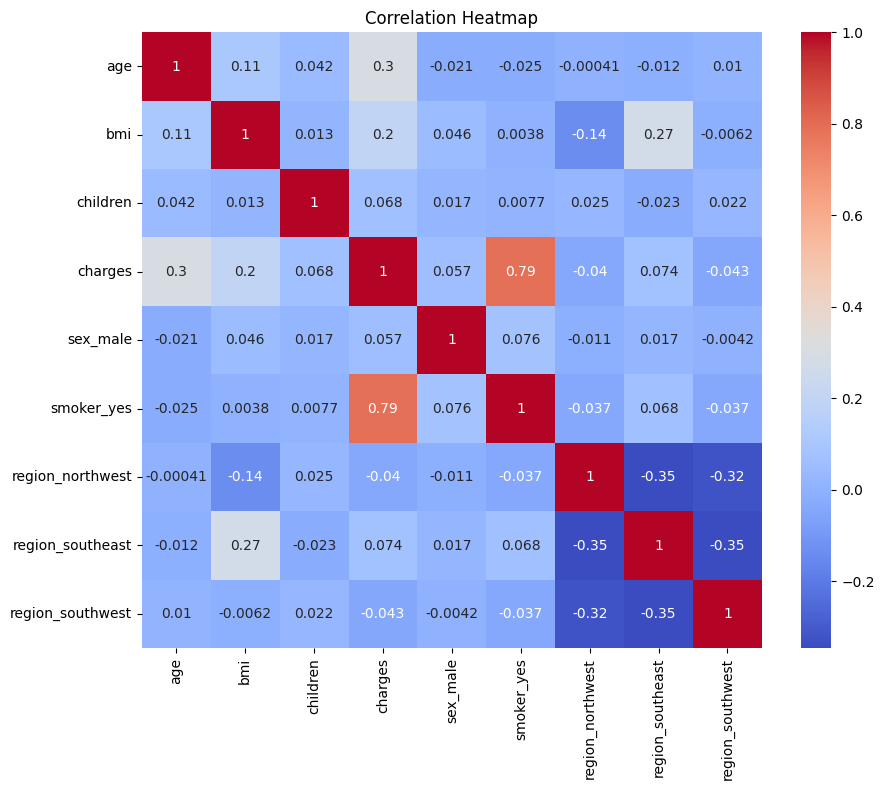

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Create a heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

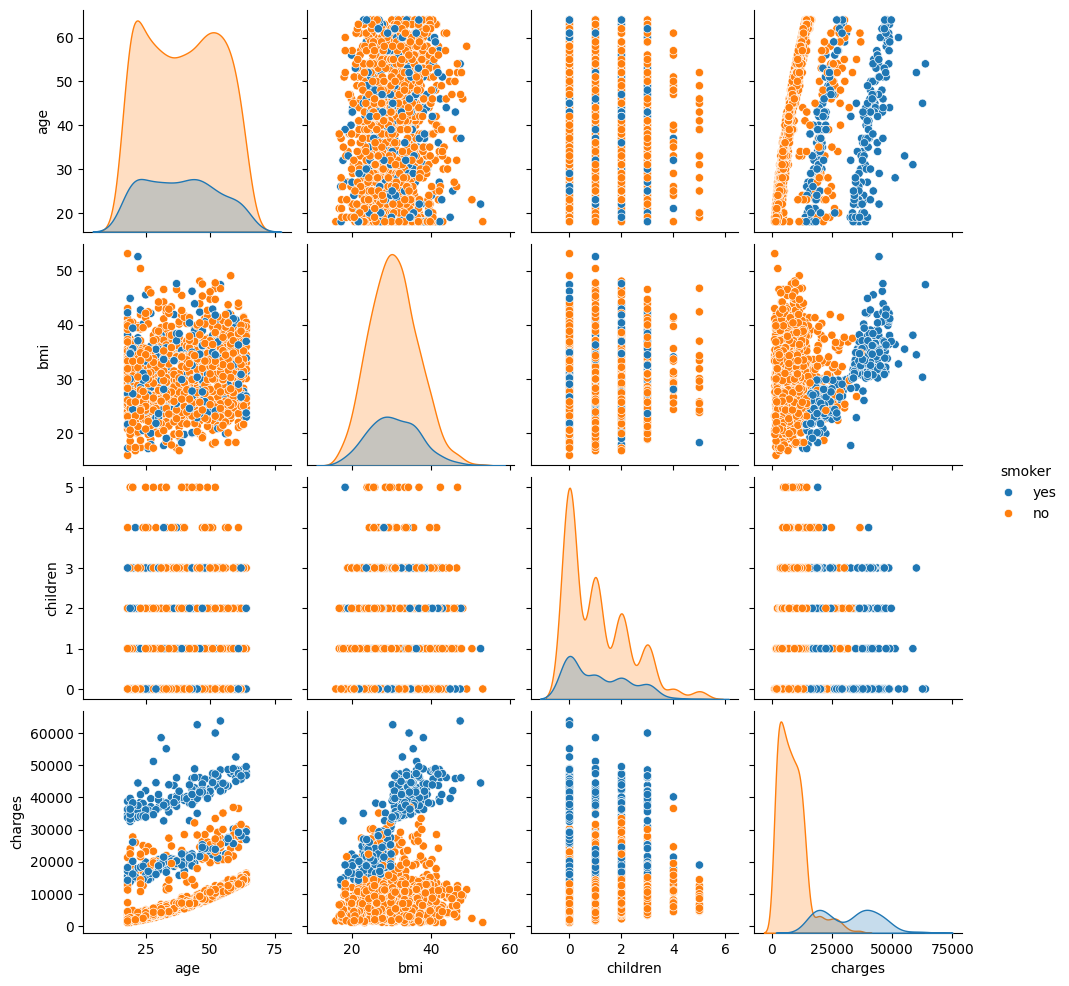

In [8]:
# Pairplot for numerical variables
sns.pairplot(data, hue='smoker')  # Optional: Color by a categorical variable
plt.show()

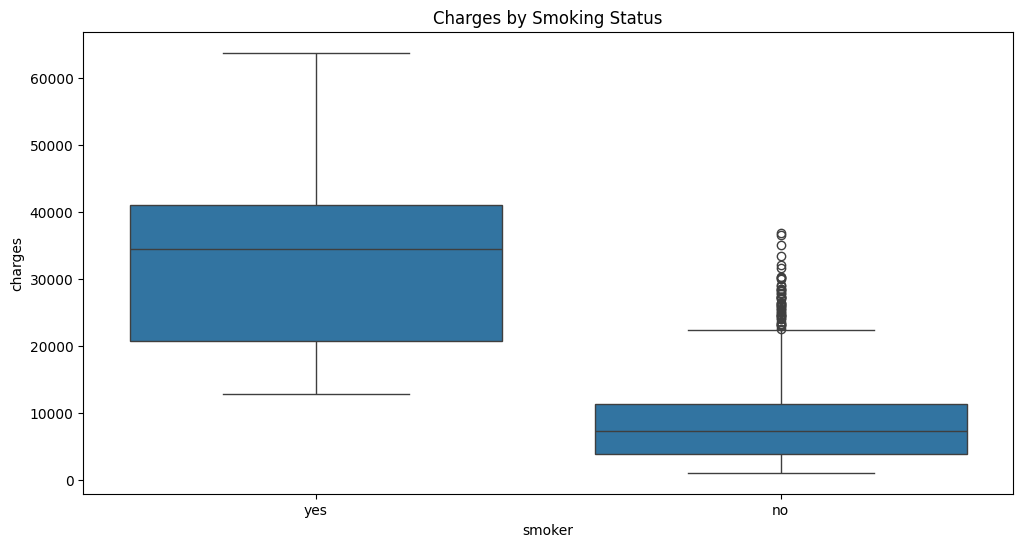

In [9]:

# Boxplots to visualize distributions of numerical variables by categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoking Status')
plt.show()


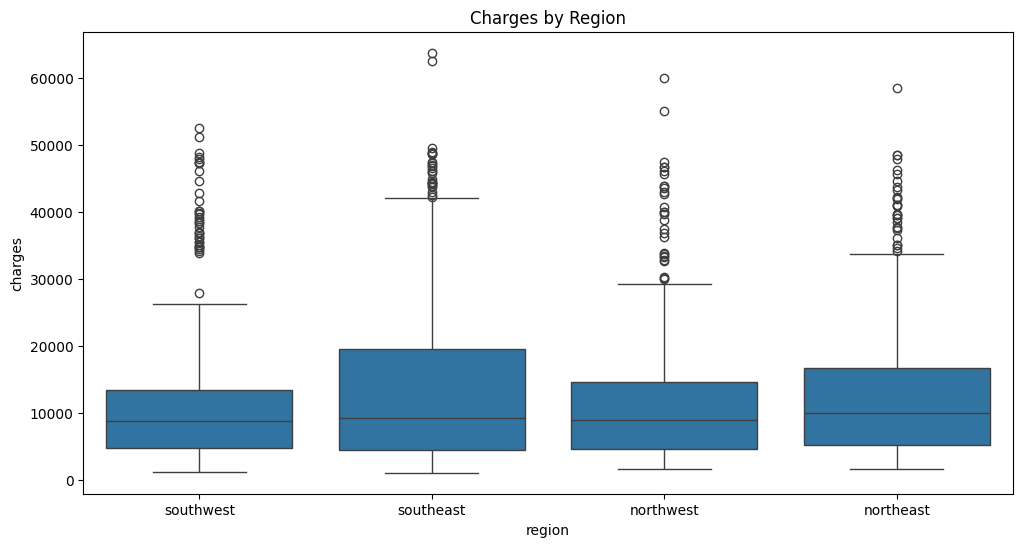

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.show()

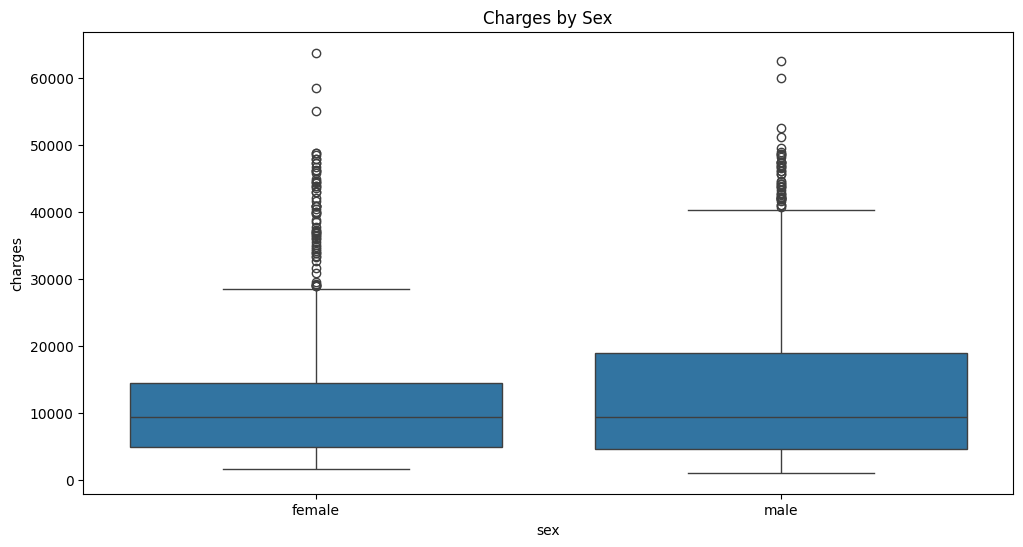

In [11]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')
plt.show()


**We notice Outliers! This can severeeverly impact the model's performance**

### 4. Normalize data

Data must be in numerical form for training purposes, as non-numeric features cannot be directly processed by machine learning algorithms.

In [12]:
# Perform one-hot encoding for categorical features
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Duplicate the dataset
data_1 = pd.concat([data], ignore_index=True)


 We will log the values to avoid havin outliers stand out! We will test the model's performance with and without outliers to see the difference

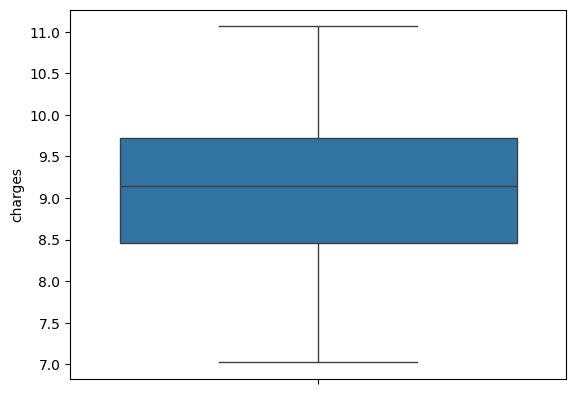

In [13]:
import numpy as np

# Log-transform the 'charges' column
data['charges'] = np.log1p(data['charges'])

# Verify the transformation
sns.boxplot(data['charges'])
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
data[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])
data_1[['age', 'bmi', 'children']] = scaler.fit_transform(data_1[['age', 'bmi', 'children']])

In [15]:
# Features and target
X = data.drop(columns=['charges'])  # All columns except target
y = data['charges']  # Target column

In [16]:
#with outliers
X_1 = data_1.drop(columns=['charges'])  # All columns except target
y_1 = data_1['charges']  # Target column

In [17]:
#Once we split, we save 80% fro training, and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train), len(y_train)

(1070, 1070)

In [18]:
#Once we split, we save 80% fro training, and 20% for test
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1,test_size=0.2,random_state=42)
len(X1_train), len(y1_train)

(1070, 1070)

In [19]:
import tensorflow as tf

# Convert to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)


In [20]:
X1_train = tf.convert_to_tensor(X1_train, dtype=tf.float32)
X1_test = tf.convert_to_tensor(X1_test, dtype=tf.float32)
y1_train = tf.convert_to_tensor(y1_train.values, dtype=tf.float32)
y1_test = tf.convert_to_tensor(y1_test.values, dtype=tf.float32)

### 5. Create Model

### With outliers

In [32]:
# Define the model architecture
import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model_1.compile(
    loss='mse',  # Mean Squared Error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']  # Mean Absolute Error
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model ( without removing outliers)
history_1 = model_1.fit(X1_train, y1_train, validation_split=0.2, epochs=300, batch_size=32, callbacks=[early_stopping])



Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 315083552.0000 - mae: 13198.4824 - val_loss: 310327040.0000 - val_mae: 12653.9961
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 331668032.0000 - mae: 13813.8281 - val_loss: 310228992.0000 - val_mae: 12650.4004
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305460736.0000 - mae: 13049.7100 - val_loss: 309977120.0000 - val_mae: 12641.4443
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 319512544.0000 - mae: 13477.5244 - val_loss: 309442304.0000 - val_mae: 12622.6318
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325212896.0000 - mae: 13623.6006 - val_loss: 308477408.0000 - val_mae: 12588.7031
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309766592.0000 - mae: 13152.1279 - val_loss: 306924064.0000 - val_mae: 12533.8926
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 328881856.0000 - mae: 13499.5801 - val_loss: 304641152.0000 - val_mae: 12452.9072
Epoch 8/300


The results on this one are really bad. Let's evaluate it.

In [33]:
model_1.evaluate(X1_test,y1_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31824760.0000 - mae: 4045.7842


[33542954.0, 4078.86328125]

We notice a mae average of 4079 and a loss of 33686852.0.

### Without outliers

In [34]:
# Define the model architecture
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(
    loss='mse',  # Mean Squared Error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']  # Mean Absolute Error
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model ( without removing outliers)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=32, callbacks=[early_stopping])



Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 73.8033 - mae: 8.5450 - val_loss: 54.8049 - val_mae: 7.3618
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.4574 - mae: 6.8168 - val_loss: 23.5207 - val_mae: 4.7391
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4420 - mae: 3.6406 - val_loss: 4.2766 - val_mae: 1.6693
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0682 - mae: 1.6228 - val_loss: 3.3386 - val_mae: 1.4581
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2476 - mae: 1.4502 - val_loss: 2.9039 - val_mae: 1.3209
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4753 - mae: 1.2133 - val_loss: 2.3649 - val_mae: 1.1569
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3257 - mae: 1.1799 - val_loss: 1.9786 - val_mae: 1.0340
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6802 - mae: 0.9926 - val_loss: 1.5883 - val_mae: 0.9351
Epoch 9/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [35]:

model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1182 - mae: 0.2070


[0.1357518583536148, 0.21740679442882538]

The difference is INSANE. The first model performed so poorly compared to this one. These are not the best result but we're already far away from the first results we got.

### Loss for Model_1 ( with outliers )

Text(0.5, 0, 'epochs')

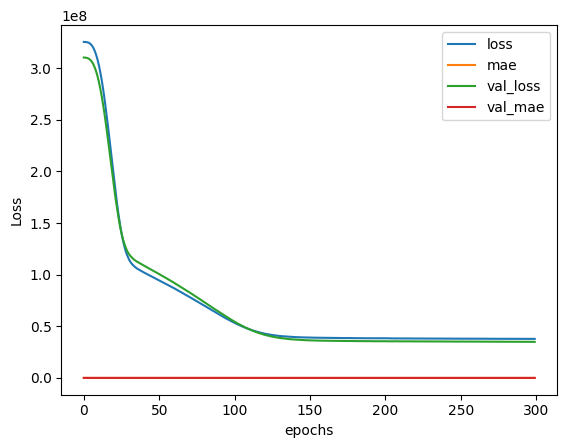

In [37]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

### Loss for Model ( without outliers)

Text(0.5, 0, 'epochs')

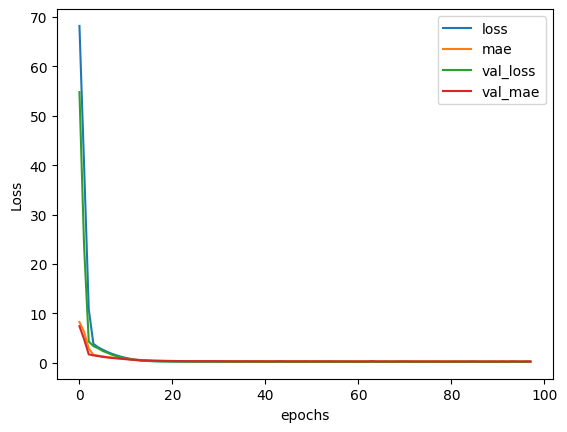

In [38]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")